### **1. Overdispersed Count Data and Exponential Family**

Let’s say you're working with count data, but you notice that your data is overdispersed, i.e., the variance exceeds the mean (which violates the Poisson assumption in GLMs). The Poisson distribution is part of the exponential family and is commonly used in GLMs. However, due to overdispersion, you're considering using a Negative Binomial model instead.

**Show that the Negative Binomial distribution can be written in exponential family form and explain what this means for its use in GLMs.**

### **Answer 1**
PMF of the Negative Binomial distribution (probability of observing $k$ failures before the $r^{th}$ success.) is:
<br/>
$
P(X = k) = \binom{y + r - 1}{r - 1} p^r (1 - p)^y \quad $
<br/>
$ \text{for }y = 0, 1, 2, \dots$
<br/>
The distribution can be written as:
<br/>
$\binom{y + r - 1}{r - 1}\space exp(r\space log\space p\space +y\space log(1-p))$
<br/>
$\binom{y + r - 1}{r - 1}\space exp(y\space log(1-p)-(-r\space log\space p\space))$
<br/>
<br/>
By comparing this to general form of exponential family:
<br/>
$b(y)=\binom{y + r - 1}{r - 1}$
<br/>
$η=log(1-p)$
<br/>
$a(η)=-rlogp=-r\space log(1-e^{η})$
<br/>
Negative binomial distribution can be written in the form of exponential family.
<br/>
For poisson distribution, mean equals variance. While overdispersion, we cannot use poisson. Hence, Using negative binomial is a good choice.(produces positive values like poisson)

### **2. Logistic Regression and Decision Boundaries**

Suppose you fit a logistic regression model:

$$ \hat{y} = \sigma(w^T x + b)$$

where $\sigma$ is the sigmoid.

**(a)** Show that the decision boundary corresponds to:

$$w^T x + b = 0$$

**(b)** Describe the shape of the decision boundary and how it changes with different weight magnitudes.

### **Answer 2**
a) Logistic regression model:
<br/>
$
\hat{y} = \sigma(w^T x + b) \quad \text
h(x) =
\begin{cases}
1 & \hat{y} \geq 0.5 \\
0 & \hat{y} < 0.5
\end{cases}
$ This is the classifier function
<br/>
<br/>
Decision boundary is $\hat{y}=0.5$ i.e.
<br/>
$σ(w^Tx+b)=0.5$
<br/>
$\frac{1}{1+e^{-(w^Tx+b)}}=0.5$
<br/>
$e^{-(w^Tx+b)}=1$
<br/>
$w^Tx+b=0$ Hence, this is the decision boundary.
<br/>
<br/>
b) The shape of decision boundary is linear hyperplane dividing into two spaces. While altering the weights (different magnitudes), the sigmoid function becomes steeper. derivative of sigmoid function is $σ(z)(1-σ(z)$. If there is smaller weight, sigmoid function is more flatter. With larger magnitude, there is abrupt transition between 2 classes.

### **3. GEM Algorithm and Convergence**

When attempting to run the EM algorithm, it may sometimes be difficult to perform the M step exactly, we often need to implement numerical optimization to perform the maximization, which can be costly. Therefore, instead of finding the global maximum of our lower bound on the log-likelihood, an alternative is to just increase this lower bound a little bit, by taking one step of gradient ascent, for example. This is commonly known as the Generalized EM (GEM) algorithm.

Put slightly more formally, recall that the M-step of the standard EM algorithm performs the maximization:

$$\theta := \arg\max_{\theta} \sum_i \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}
$$

The GEM algorithm, in contrast, performs the following update in the M-step:

$$\theta := \theta + \alpha \nabla_{\theta} \sum_i \sum_{z^{(i)}} Q_i(z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}; \theta)}{Q_i(z^{(i)})}
$$

where $\alpha$ is a learning rate which we assume is chosen small enough such that we do not decrease the objective function when taking this gradient step.

**Prove that the GEM algorithm described above converges.**
To do this, you should show that the likelihood is monotonically improving, as it does for the EM algorithm — i.e., show that:

$$\ell(\theta^{(t+1)}) \geq \ell(\theta^{(t)})$$
ipschitz‐continuous on $[0,1]$. You still want to use a tree structure, like before.
How well can this tree approximate (come close to, like error) the smooth function?
Intuitively explain also.

### **Answer 3.**
By Jensen's inequality:
<br/>
$log\space p(x^i;\theta )\geq ELBO(x^i;Q_i,\theta )=\sum_{z^i}Q(z^i)\space log\frac {p(x^i,z^i;\theta )}{Q(z^i)}$
<br/> taking sum over all examples:
<br/>
$l (\theta)\geq \sum_i \sum_{z^i}Q_i(z^i)\space log\frac {p(x^i,z^i;\theta )}{Q_i(z^i)}$
<br/>
In $E$ step we set $Q_i(z^i)=p(x^i,z^i;\theta )$ This maximises ELBO wrt Q. Suppose at some particular t, <br/>
$l(\theta) = ELBO(Q^t,\theta^t)$
<br/>
Now in generalised EM algorithm:<br/>
In this, parameter \alpha is chosen so as to make sure that it never decreases the function(ELBO)
<br/>
$\theta ^{t+1} := \theta ^t + \alpha \nabla  _\theta ELBO(Q^t,\theta ) $
<br/> Hence,
$ELBO(Q^t,\theta ^{t+1})\geq ELBO(Q^t,\theta ^t)$
<br/>
For all $Q$ and $\theta $ values <br/>
$l(\theta ) \geq ELBO(Q,\theta )$and <br/>
$l(\theta ^{t+1} ) \geq ELBO(Q^t,\theta ^{t+1} )$
<br/> From all the relations we have, <br/>
$l(\theta ^{t+1} ) \geq ELBO(Q^t,\theta ^{t+1} )\geq ELBO(Q^t,\theta ^t)=l(\theta ^t)$
<br/>
Thus, likelihood is monotonically improving, as it does for the EM algorithm.

### **4. How Many Boxes Can a Tree Make?**

Imagine a decision tree that only asks “Is feature 1 ≥ 5?”, “Is feature 2 ≥ 3?”, etc., one at a time, up to $d$ questions in a row (that’s the tree depth).

**(a)** If each of these regions is further split by similar binary questions, how many total regions are created after $d$ binary splits?

**(b)** Why does this constraint result in all regions being axis-aligned hyperrectangles rather than diagonal or curved shapes?

**(a)** Draw a tiny example with depth 2 on a 2‑D plane.

**(b)** If the binary questions were allowed to involve linear combinations of multiple features (e.g., “Is $2 \cdot \text{feature}_1 + 3 \cdot \text{feature}_2 \geq 7$?”), how would the geometry of the resulting regions differ from the axis-aligned case?

### **Answer 4.**
a) If each of these regions is further split by similar binary questions, there will be in total  $2^d$ regions
<br/>
<br/>
b) If we split the higher dimensional space according to the questions asked, we get different regions (sliced from the space). Now, if questions are asked along a single feature, Example: Is feature 1 ≥ 5? etc, so this decision boundary resultes in axis- aligned hyperrectangles.
<br/>
<br/>
c) 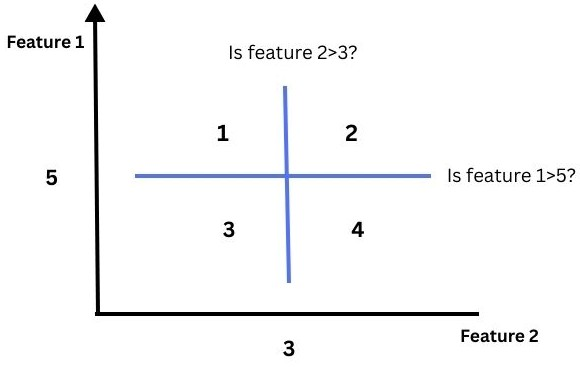

<br/>
<br/>
d) Now, decision boundary is not aligned to just one axis. In 2D plance, it will be diagonal line, in 3-D a plane that is tilted, Hence, the regions formed will not be axis-aligned, as combination of features are used.

### **5. Representing Piecewise‐Constant Functions**

Let $f:\mathbb{R} \to \mathbb{R}$ be any step function with $L$ distinct intervals of constant value.

**(a) Exact representation:**
Can you build a tree that perfectly matches this function?
What is the min depth you require?

**(b) Approximation rate:**
Now suppose $f$ is Lipschitz‐continuous on $[0,1]$. You still want to use a tree structure, like before.
How well can this tree approximate (come close to, like error) the smooth function?
Intuitively explain also.

### **Answer 5.**
a) Yes, we can build a tree that perfectly matches this function. The minimum depth is $log_2L$, because the tree separates recursively each region into 2.
<br/>
<br/>
b) Suppose a function $f$ is Lipschitz‐continuous on $[0,1]$ such that
<br/>
$L|x-y|\geq|f(x)-f(y)| $ $∀ x,y ∈ [0,1]$
<br/>
The interval is divided into $M$ equal intervals i.e.$M=2^d$, where $d$ is depth of the tree.
Width of each region is $k=\frac{1}{M}$, Let's say a region goes from $a$ till $b$, so $b-a=k$
<br/>
<br/>
Maximum error occurs when x is at one of the end point(becomes like linear)
<br/>
$|f(b)-f(a)|\leq L|b-a|\leq Lk$
<br/>
Error: $E=|f(b)-\frac{f(b)+f(a)}{2}|=\frac{|f(b)-f(a)|}{2}\leq \frac{Lk}{2} $
<br/>
$E\leq \frac{L}{2M}\leq \frac{L}{2^{d+1}}$


### **6. PCA Mean Centering and Linear Regression Relation**

**(b)** If in a dataset each row represents a sample, and the values in each column for that row represent the value of the feature corresponding to that column, for that sample. Then explain:

If the dataset is of shape $(10000, 2000)$, along which axis would I take the mean before performing PCA? Why would I not do it in the other axis? Explain why that will be a problem.

**(c)** When trying to fit a Linear regression line to some 2D data, and also trying to apply PCA on it, reason if the line obtained by the 1st principal component (PC1) will be the same line as obtained by Linear Regression (True/False). Reason should be mathematically/geometrically backed — a rough theoretical explanation would do.

### **Answer 6.**
b) If the dataset is of shape $(10000,2000)$ we take mean along axis=0 before performing cpa. Here we have samples=10000, features=2000. Before PCA, we subtract mean of feature across all samples. This gives $1 \times 2000$ vector. We don't take mean along axis=1, Subtracting sample mean would make each observation have zero mean, but feature remains non-zero. But we dont require this in PCA. In covariance formula, We require expectation of $X$(mean of feature- vector). Using this will lead to incorrect principal components.
<br/>
<br/>
c)False.  the first principal component line is not the same as regression line. PCA finds the axis that maximizes the projected variance of the data, whereas regression line minimizes the vertical distances of points to the line.



